In [2]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
# import imutils
import qrcode
# from pyzbar.pyzbar import decode
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook


output_notebook()


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

Loading BokehJS ...

float32


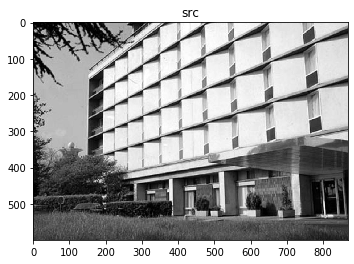

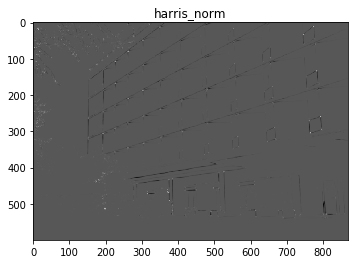

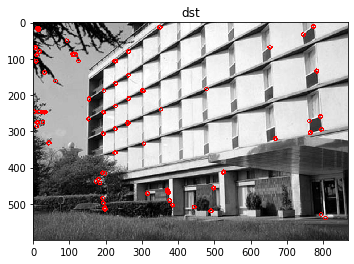

(600, 868)


(array([8.70000e+01, 4.70000e+02, 7.58900e+03, 5.10984e+05, 1.43100e+03,
        1.69000e+02, 5.10000e+01, 1.30000e+01, 4.00000e+00, 2.00000e+00]),
 array([-0.00518376, -0.00366466, -0.00214555, -0.00062645,  0.00089266,
         0.00241177,  0.00393087,  0.00544998,  0.00696908,  0.00848819,
         0.01000729], dtype=float32),
 <a list of 10 Patch objects>)

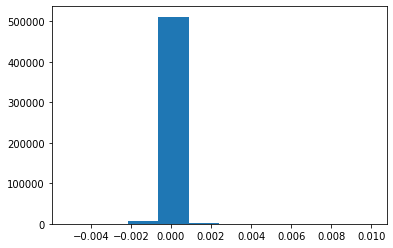

In [2]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()
harris = cv2.cornerHarris(src, 3, 3, 0.04)
print(harris.dtype)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 130:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

print(harris.shape)

plt.hist(harris.ravel())


uint8


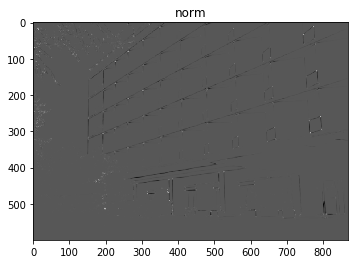

In [3]:
harris_norm = cv2.normalize(harris,None,0,255,cv2.NORM_MINMAX,cv2.CV_8U)
print(harris_norm.dtype)
imshow("norm",harris_norm)

float32


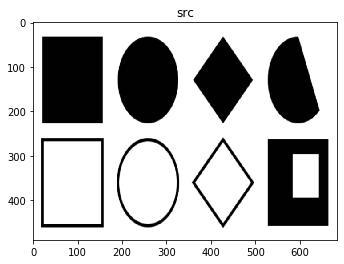

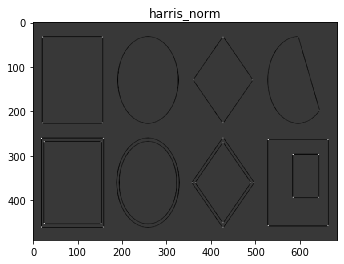

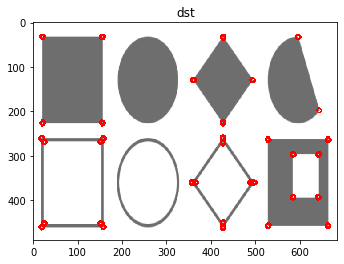

(490, 686)


(array([5.6500e+03, 1.4325e+04, 3.1595e+05, 9.5000e+01, 4.4000e+01,
        2.1000e+01, 2.6000e+01, 1.9000e+01, 6.0000e+00, 4.0000e+00]),
 array([-0.00114988, -0.00063836, -0.00012684,  0.00038467,  0.00089619,
         0.00140771,  0.00191923,  0.00243074,  0.00294226,  0.00345378,
         0.0039653 ], dtype=float32),
 <a list of 10 Patch objects>)

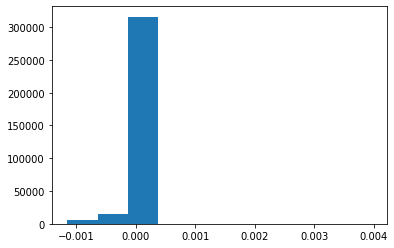

In [4]:
src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()
harris = cv2.cornerHarris(src, 3, 3, 0.04)
print(harris.dtype)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 60:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

print(harris.shape)

plt.hist(harris.ravel())


float32


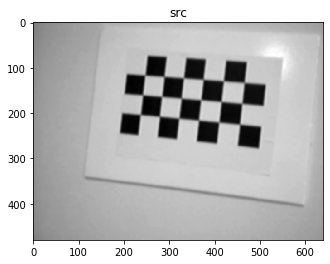

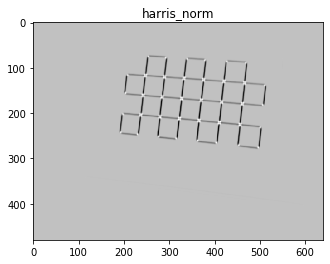

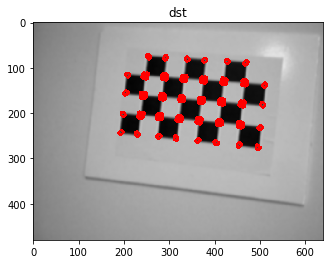

(480, 640)


(array([2.7500e+02, 1.0080e+03, 7.5400e+02, 6.6400e+02, 1.1140e+03,
        3.1310e+03, 3.6190e+03, 2.9563e+05, 6.7800e+02, 3.2700e+02]),
 array([-2.0577187e-04, -1.7861766e-04, -1.5146344e-04, -1.2430923e-04,
        -9.7155018e-05, -7.0000802e-05, -4.2846590e-05, -1.5692376e-05,
         1.1461836e-05,  3.8616050e-05,  6.5770262e-05], dtype=float32),
 <a list of 10 Patch objects>)

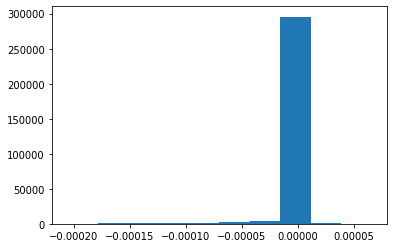

In [5]:
src = cv2.imread('chessBoard.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src,(11,11),0)

#  block 크기, 소벨크기,    k=0.04~0.06     R=Det() - kTr()
harris = cv2.cornerHarris(src, 3, 3, 0.04)
print(harris.dtype)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 200:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

print(harris.shape)

plt.hist(harris.ravel())


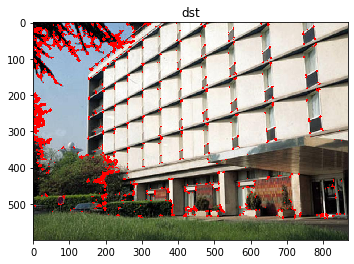

In [6]:
gray=cv2.imread("building.jpg",0)
img=cv2.imread("building.jpg")
dst=cv2.cornerHarris(gray,5,3,0.04)

img[dst>0.01*dst.max()]=[0,0,255]
imshow('dst',img)

851
(160.0, 3.0)


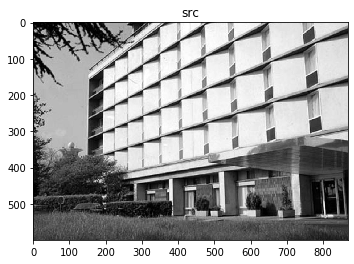

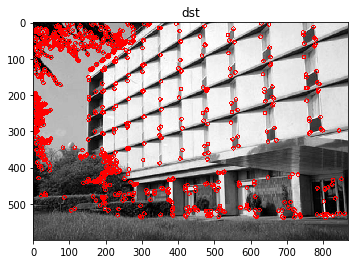

In [7]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)
#src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.
keypoints = fast.detect(src)
print(len(keypoints))
print(keypoints[0].pt)
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)

(480, 640)


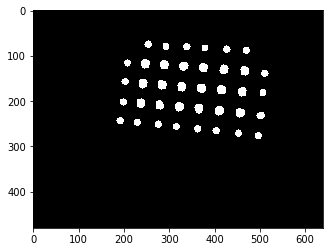

In [8]:
src = cv2.imread('chessBoard.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출딤, 원에서도 검출되지만 중첨되서 검출될수 있음.
keypoints = fast.detect(src)

mask = np.zeros(src.shape,dtype='uint8')

print(mask.shape)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(mask, pt, 8, (255, 255, 255),-1)
imshow("",mask)        


38


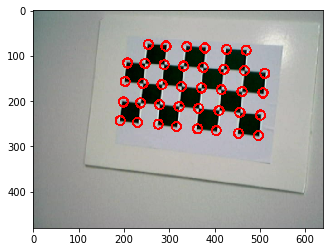

[[497, 276], [453, 271], [404, 265], [363, 261], [316, 256], [276, 251], [230, 247], [192, 243], [502, 231], [456, 225], [410, 221], [365, 216], [322, 212], [279, 208], [237, 204], [199, 202], [507, 182], [461, 179], [415, 175], [371, 171], [327, 168], [284, 164], [242, 161], [203, 157], [511, 139], [466, 133], [421, 130], [375, 126], [332, 123], [289, 120], [208, 116], [247, 117], [470, 88], [427, 86], [379, 83], [339, 80], [293, 79], [254, 75]]


In [9]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE,
                cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

src = cv2.imread('chessboard.jpg')
points = []
for con in contours :
    M = cv2.moments(con, True)
    #print(M)
    cx  = int(M['m10'] / M['m00'])
    cy  = int(M['m01'] / M['m00'])    
    cv2.circle(src, (cx,cy ), 10, (0,0, 255), 3)          
    points.append([cx, cy ])
imshow("", src)
print(points)

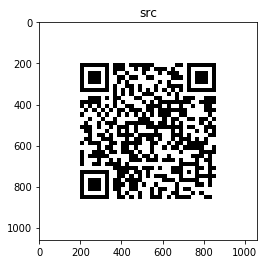

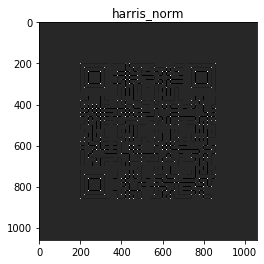

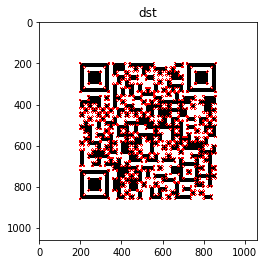

In [10]:
src = cv2.imread('acronet.png', cv2.IMREAD_GRAYSCALE)

harris = cv2.cornerHarris(src, 3, 3, 0.04)
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

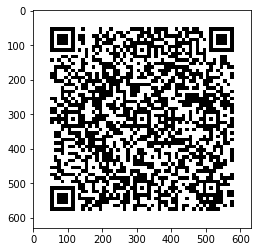

In [11]:
qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 10,
     border = 5)

#url = 'http://www.naver.com'
url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8'
qr.add_data(url)
qr.make()

img = qr.make_image(fill_color="black", back_color="white")

plt.imshow(img, cmap="gray")

img.save("qrcode.png")

https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8


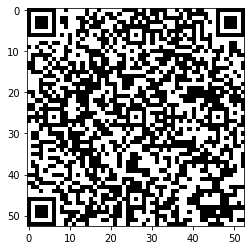

In [12]:
image = cv2.imread('qrcode.png')
#image = cv2.imread('3.png')
#image = cv2.imread('barqr.png')
qrDecoder = cv2.QRCodeDetector()
data,bbox,rectifiedImage = qrDecoder.detectAndDecode(image)

print(data)

imshow("", rectifiedImage )

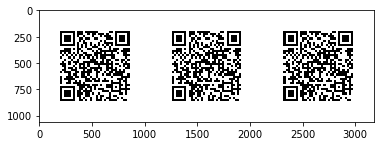

In [13]:
qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 20,
     border = 10)

url = 'http://www.acronet.kr/24987'
qr.add_data(url)

qr.make()

img = qr.make_image(fill_color="black", back_color="white")

plt.imshow(img, cmap="gray")

img.save("acronet.png")

img = cv2.imread("acronet.png")
img = np.hstack([img, img, img])
cv2.imwrite("3.png", img)
imshow("", img)

[Decoded(data=b'http://www.acronet.kr/24987', type='QRCODE', rect=Rect(left=201, top=201, width=658, height=658), polygon=[Point(x=201, y=201), Point(x=201, y=859), Point(x=859, y=859), Point(x=859, y=201)])]


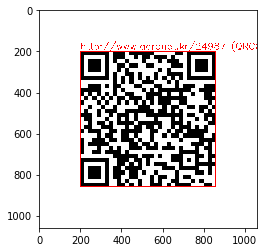

In [14]:
from pyzbar.pyzbar import decode

image = cv2.imread('acronet.png')
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = decode(image)
print(code)

for barcode in code:
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2) 
imshow("", image)

desc1.shape (453, 32)
desc2.shape (500, 32)


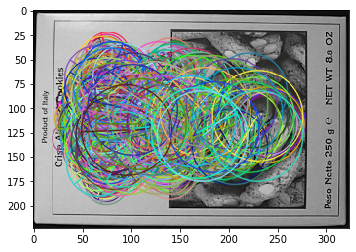

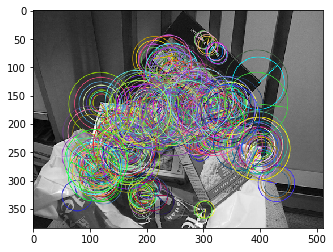

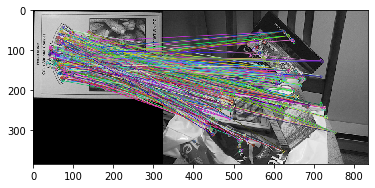

0
487
86.0
-5.662790697674419
-3.1643835616438354
-2.909090909090909
-0.7471264367816093
2.4634146341463414
0.8701298701298699
5.2073170731707314
5.636363636363637
1.506849315068493
7.7368421052631575
7.987654320987654
4.578947368421052
5.9324324324324325
10.986486486486486
13.75
9.573170731707318
14.588235294117647
13.647887323943662
16.848837209302324
16.614285714285714
16.121951219512194
17.797619047619047
17.243243243243242
16.87142857142857
23.160493827160494
20.595238095238095
25.05263157894737
26.151898734177216
22.28787878787879
25.63855421686747
23.375
25.826666666666668
30.821428571428573
26.430555555555557
30.91025641025641
28.057142857142857
32.0253164556962
31.166666666666668
35.943661971830984
34.7037037037037
37.220588235294116
32.916666666666664
38.45679012345679
35.892307692307696
42.734939759036145
38.43421052631579
42.642857142857146
44.67088607594937
44.951219512195124
48.130434782608695
47.328947368421055
49.848101265822784
48.16883116883117
52.12820512820513
52.50

In [15]:
src1=cv2.imread('box.png',cv2.IMREAD_GRAYSCALE)
src2=cv2.imread('box_in_scene.png',cv2.IMREAD_GRAYSCALE)

orb=cv2.ORB_create()
keypoint1,desc1=orb.detectAndCompute(src1,None)
keypoint2,desc2=orb.detectAndCompute(src2,None)

print('desc1.shape',desc1.shape)
print('desc2.shape',desc2.shape)

dst1=cv2.drawKeypoints(src1,keypoint1,None,(-1,-1,-1),cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2=cv2.drawKeypoints(src2,keypoint2,None,(-1,-1,-1),cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow("",dst1)
imshow("",dst2)

matcher=cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches=matcher.match(desc1,desc2)

dst=cv2.drawMatches(src1,keypoint1,src2,keypoint2,matches,None)


imshow("",dst)

print(matches[0].queryIdx)
print(matches[0].trainIdx)
print(matches[0].distance)

for m in matches:
    print(f"{m.queryIdx -m.trainIdx /m.distance}")

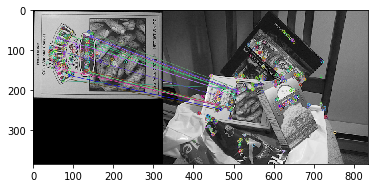

True

In [16]:
matches=sorted(matches,key=lambda x:x.distance)
good_matches=matches[:20]

dst2=cv2.drawMatches(src1,keypoint1,src2,keypoint2,good_matches,None)

imshow("",dst2)
cv2.imwrite("orb2.png",dst2)

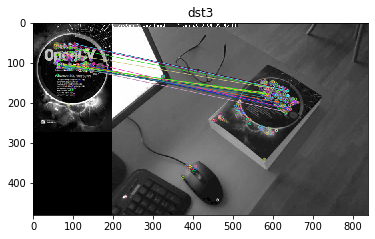

True

In [17]:
src1 = cv2.imread('book3.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('book3_1.jpg', cv2.IMREAD_GRAYSCALE)
    
orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:20]

dst3 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

imshow('dst3', dst3)
cv2.imwrite("orb3.png", dst3)

In [4]:
img1=cv2.imread("img1.jpg")
img2=cv2.imread("img2.jpg")
img3=cv2.imread("img3.jpg")

In [11]:
files=[img1,img2,img3]
imgs=[]
print(files[0])
#imshow('', files[0])
for file in files:
    img =cv2.imread(file)
    imgs.append(img)
    
print(imgs)

[[[190 174 162]
  [191 175 163]
  [191 175 163]
  ...
  [197 191 186]
  [198 189 186]
  [198 189 186]]

 [[191 175 163]
  [192 176 164]
  [192 176 164]
  ...
  [196 190 185]
  [198 189 186]
  [197 188 185]]

 [[191 175 163]
  [192 176 164]
  [191 175 163]
  ...
  [199 190 186]
  [197 188 185]
  [198 189 186]]

 ...

 [[118 123 126]
  [122 127 130]
  [126 131 134]
  ...
  [ 88  99 107]
  [ 86  95 104]
  [ 85  94 103]]

 [[121 126 129]
  [124 129 132]
  [125 128 132]
  ...
  [ 80  91  99]
  [ 81  92 100]
  [ 85  96 104]]

 [[121 126 129]
  [125 130 133]
  [128 131 135]
  ...
  [ 83  94 102]
  [ 83  94 102]
  [ 84  95 103]]]


SystemError: <built-in function imread> returned NULL without setting an error

In [ ]:
    
stitcher=cv2.Stitcher_create()
status,dst=stitcher.stitch(imgs)
cv2.imwrite("result1.png",dst)
imshow("",dst)

print("------------")